<a href="https://colab.research.google.com/github/AIMosta/All-About-AI-Python-Edition/blob/master/Course%208-%20Neural%20Networks/AAA_ped_w8_c1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://docs.google.com/uc?export=download&id=1ap18raVTUCSJeGzTLz9kViroFGvTknrV">
# Artificial Neural Networks: Introduction to ANN
[Colaboratory Notebook](https://colab.research.google.com/drive/1CqYwu9NzeXuUNeR8RmkDplUd71DHWNod)

>[Artificial Neural Network: Introduction to ANN](#scrollTo=b9q-VxEW5tRs)

>[1- Introduction to ANN](#scrollTo=1oBho425Q7ca)

>>[Concept](#scrollTo=yLvtrsm0RcWq)

>>[NeuroLab](#scrollTo=A8DvRRWlRdGi)

>>[Neurolab example details](#scrollTo=OjzIaOe1RdZ2)

>[2- Perceptron](#scrollTo=VL49qQMiRCfC)

>>[Definition](#scrollTo=QtI6YjSJRzo8)

>>[The functions](#scrollTo=Tg2exEipRz7w)

>>[Single Layer Perceptron](#scrollTo=lYnbKQUdR0Ou)

>[3-Single Layer Perceptron](#scrollTo=Nhm8OJc_RFU8)

>>[SLP Learning](#scrollTo=TOgMnI_CR7QE)

>>[SLP Learning: Perceptron Rule](#scrollTo=iJCObGCDR7Wk)

>>[Gradient Descent](#scrollTo=Zd06of0ZR7JC)

>>[SLP Learning: Delta Rule](#scrollTo=QrWP65T-VEVG)

>[4- SLP examples](#scrollTo=Ca8Ofrs7RHwC)

>>[With sklearn: perceptron rule](#scrollTo=xn8bZSmqSBwY)

>>[Example with neurolab: delta rule](#scrollTo=157T7zEfSB_u)

>[5-Multi-Layer Perceptron](#scrollTo=5aXVjrUrRNGi)

>>[Multi-Layer Perceptron](#scrollTo=_RT-oRvhVeFM)

>>[Backpropagation](#scrollTo=yMgLDZAdSGjG)

>>[Example](#scrollTo=Z7prBx0pSGbS)

>[6- ANN topologies](#scrollTo=CffbTqAERQKg)

>>[FeedForward Neural Networks](#scrollTo=23ma5K3xSKrS)

>>[Recurrent Networks](#scrollTo=WIGdB_nfSK9o)

>>[Fully connected Neural Network](#scrollTo=_6H6Ca-GSK4-)

>[References](#scrollTo=tSbN2yDrRSdW)



# 1- Introduction to ANN



## Concept

* The idea of an **Artificial Neural Network** (**ANN**) is to build a model based on the way the human brain **learns new** things.

* It can be used in any type of **machine learning**. It learns by extracting the different underlying patterns in a given data.

* This extraction is performed by stages, called **layers**. Each layer, which is composed by a set of **neurons**, will identify a certain pattern. The following layer, will identify another **more complex** pattern, from its previous layer.

* The first layer, has the training data as input. It is called the** input layer**. In the last one, the output of the neurons are the final output.  It is called the **output** layer. The layers in between, are called **hidden layers**.
* From now, the term **neural network** will mean **artificial neural network**.

## NeuroLab

* Neurolab is Neural Network library for Python. It supports several types of neural networks.

* For installation, just type: ```!pip install neurolab```

* Like other machine learning techniques, a neural network need to be trained. Can be tested. And will be used to predict results.

* Here is an example of how to use neurolab to create a neural network, and how to perform the fore-mentioned tasks:

In [0]:
# installation of neurolab
!pip install neurolab

    100% |████████████████████████████████| 655kB 21.4MB/s 
  Stored in directory: /root/.cache/pip/wheels/c6/8f/37/32ab1cf4d601dc0bc49d7241012a4292db4b343bebff5b68e6
Successfully built neurolab


In [0]:
import numpy as np
import neurolab as nl
# Create data
myInput = np.random.uniform(-0.5, 0.5, (10, 2))
# the labels correspond to the sum of two values
myLabels = (myInput[:, 0] + myInput[:, 1]).reshape(10, 1)
# Create network with 2 inputs, 5 neurons in hidden layer and 1 in output layer
myNN = nl.net.newff([[-0.5, 0.5], [-0.5, 0.5]], [5, 1])
# Train process
myErr = myNN.train(myInput,myLabels, show=15)

# Test and prediction process
pred= myNN.sim([[0.2, 0.1]])
# the result should be 0.3
testErr= np.abs(0.3-pred)
print ("Prediction=",pred)
print ("Test error = ",testErr)


Epoch: 15; Error: 0.010827781453884296;
The goal of learning is reached
Prediction= [[0.27888876]]
Test error =  [[0.02111124]]


In [0]:
print("Training errors until converngence:",myErr)

Training errors until converngence: [0.32999912867545295, 0.2486661444665599, 0.1292945419367547, 0.0657565980545697, 0.05055297062542579, 0.036675825916531894, 0.02110533590934114, 0.01961050932435214, 0.017889590335269934, 0.017030460795990566, 0.01633692456059261, 0.015204223587932907, 0.013680298794147413, 0.012248254413184468, 0.010827781453884296, 0.010075997772901696, 0.009250550249635933]


## Neurolab example details


* Data: **10** samples described by **2** features. The labels are the **sum** of the  **2** features. In fact, the NN tries to model the **sum** function for values ranging from **-0.5** to **0.5 **

* After creating the data, the steps were:
   * Create an instance of a neural network with specified number of layers and neurons (``` nl.net.newff ```)
   * Train the neural network (``` myNN.train ```)
   * Predict the output for the value [0.2,0.1] (``` myNN.sim ```)
   * Compute the test error (the true label is known: 0.2+0.1)

# 2- Perceptron

## Definition

* The term **Perceptron** refers to an input layer of data features values, with **forward weighted** connections to an output **layer ** of **one single neuron** , or of **multiple neurons**.

* One of the simplest form of a neuron is an **LTU**.

* **LTU**, for **L**inear **T**hreshold **U**nit, it is a component (**neuron**) that:
  * Computes a **weighted sum** of its inputs: a linear function
  * Applies a **step** function to the resulting sum, and **outputs** the results

## The functions
* The weighted sum function, is also called the **Propagation** function.
* The step function, can be :
  * A **non-linear** function, in this case, it will be  called the **threshold activation function** **(** This is the case of an LTU **)**. For example:
    * Heaviside step function:
    
    $heaviside(z)=\begin{cases}
0,  & \text{if $z < 0$} \\[2ex]
1  & \text{if $z >=0$} 
\end{cases}
$
    * Sign function:
        $sgn(z)=\begin{cases}
-1,  & \text{if $z < 0$} \\[2ex]
0  & \text{if $z =0$} \\[2ex]
1  & \text{if $z >=0$} 
\end{cases}
$

  * A **linear** function, simply called **activation function**. For example:
    * The **identity function**: which means that the value computed by the propagation function, is the output value of the neuron.
  * A **semi-linear** function, that is **monotonous** and **differentiable**. Also called **activation function**.

## Single Layer Perceptron
* A **S**ingle **L**ayer **P**erceptron **(SLP)**, is simply a Perceptron with only one layer (**without** counting the **input layer** ) .
* So, it is composed of an **input** layer and an **output** layer. The later one can have one ore more outputs. So, it can be used for binary and for multioutput classification 

* Considering an ANN in general, a **Perceptron** is considered as a **feedforward** neural network. We are going to talk about it in the next section.

* An **SLP** an apply **2** different kind for **rules** to learn: **the perceptron** rule, or the **delta rule**. Each of the rules is associated with a certain type of activation function.  To apply the delta rule, we need the activation function to be differentiable.

# 3-Single Layer Perceptron

## SLP Learning
<img src="https://docs.google.com/uc?export=download&id=1tL4Oi1SL7xjsPovWffuTpiyTh5pMhf6t">


## SLP Learning: Perceptron Rule
* To update the weights, the following formula is used:
$w_{i,j}^{(next~step)} = w_{i,j} + \eta \cdot (  y_j -  \hat y_j) \cdot  x_i$
* The concept is that each **wrong** prediction **reinforces** the **weight** corresponding to the **feature** that would contributed to the **correct prediction**. The computation of the weights is repeated until the samples are classified correctly.

## Gradient Descent

* The concept of the** gradient** descent:
  * With **initial parameters** of a model, predict an **output value**
  * Compute the gradient of the “**error**” (“loss”) function (function of the **parameters** of the learning model) at a certain point= the slope of the surface of that function at that point calculated by its **derivative** at that point.
  * Update the parameters in order to find the **local minima** by a step **proportional** to **the negative** of that **gradient**. (opposite direction ==> toward the local minima of the function). In the case of :
    * **A stochastic gradient descent**: with **one sample**, **predict** →  **update** the parameters for the **next sample** → predict with the next sample with the new parameters 
    * A **Batch gradient descent**: predict for all samples **==1 epoch → update** the parameters** → **predict again with the new parameters
  * Repeat the process in order to **minimize** the error.

## SLP Learning: Delta Rule


* With the activation rule being **linear** or **semi-linear** but **differentiable**, the gradient descent is used to update the weights.
* The weights are updated as follow:  $w_{i,j}^{next} = w_{i,j} + \Delta w_{i,j}$
  * In general:
 $\Delta w = \frac {- \eta \cdot \partial E} {\partial w}$
  * In a case of **a linear activation function, and a Sum-Squared error function**
    * In Online training:
for a given sample:
$\Delta w_{ i,j } = \eta\cdot x_i \cdot  ( y_j - \hat y_j ) = \eta \cdot \delta_j$
    *  In Offline training:
    $\Delta w_{ i,j } = \eta \cdot   \displaystyle \sum_{s \in X} x_i ^ s \cdot  ( y_j ^s - \hat y_j^s) = \eta \cdot   \displaystyle \sum_{s \in X} x_i ^ s \cdot \delta_j ^{~s}$









# 4- SLP examples

## With sklearn: perceptron rule

In [0]:
#SLP using Perceptron class

from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
#load iris datasets
X, y = load_iris(return_X_y=True)
# instance of a perceptron: SLP with perceptron rule
# learning rate =0.1, maximum of epoch = 5000, without shuffle after 
# each iteration
mySLP = Perceptron(eta0=0.1, max_iter=5000,tol=1e-3,shuffle=False)
mySLP.fit(X, y)
print ("The score of the classification (without shuffle) = ", mySLP.score(X, y) )

# instance of an other perceptron: SLP with perceptron rule
# learning rate =0.1, maximum of epoch = 20, with shuffle after
# each iteration
mySLPShuf = Perceptron(eta0=0.1, max_iter=20,tol=1e-3,shuffle=True)
mySLPShuf.fit(X, y)
print ("The score of the classification (with shuffle) = ", mySLPShuf.score(X, y) )


The score of the classification (without shuffle) =  0.6666666666666666
The score of the classification (with shuffle) =  0.82


In [0]:
from sklearn.linear_model import SGDClassifier
#SLP using SGDClassifier class
mySGDCl = SGDClassifier(loss="perceptron", learning_rate="constant", eta0=0.1,penalty = "none", 
                        max_iter=20, shuffle= True,tol=1e-3, verbose=2,random_state=0
                       )
mySGDCl.fit(X, y)

print ("The score of the classification (with shuffle) = ", mySGDCl.score(X, y) )

print("The number of classes = ", len(mySGDCl.classes_))


-- Epoch 1
Norm: 0.83, NNZs: 4, Bias: 0.100000, T: 150, Avg. loss: 0.065987
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.83, NNZs: 4, Bias: 0.100000, T: 300, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.83, NNZs: 4, Bias: 0.100000, T: 450, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.83, NNZs: 4, Bias: 0.100000, T: 600, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.83, NNZs: 4, Bias: 0.100000, T: 750, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 0.83, NNZs: 4, Bias: 0.100000, T: 900, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 0.83, NNZs: 4, Bias: 0.100000, T: 1050, Avg. loss: 0.000000
Total training time: 0.00 seconds.
Convergence after 7 epochs took 0.01 seconds
-- Epoch 1
Norm: 1.27, NNZs: 4, Bias: 0.000000, T: 150, Avg. loss: 1.399133
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 1.75, NNZs: 4, Bias: 0.100000, T: 300, Avg. loss:

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished


## Example with neurolab: delta rule

In [0]:
# size of the sample data
print("The number of samples= ",X.shape[0])
print("The number of Features = ",X.shape[1])

The number of samples=  150
The number of Features =  4


In [0]:
f1_mi= X[:,0].min()
f1_ma= X[:,0].max()
f2_mi= X[:,1].min()
f2_ma= X[:,1].max()
f3_mi=X[:,2].min()
f3_ma= X[:,2].max()
f4_mi=X[:,3].min()
f4_ma= X[:,3].max()
# instantiate an SLP with: 4 input nuerons for th 4 features
# with 3 output neurons : to represent the 3 classes
#  The learning rule is the Delta rule, the activation function is the 
# SoftMax function
mySLPDelta = nl.net.newp([[f1_mi,f1_ma],[f2_mi,f2_ma],[f3_mi,f3_ma],[f4_mi,f4_ma]],3,
                         transf=nl.trans.SoftMax())


In [0]:
# separate the data into test and train samples
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [0]:
# we have to construct the target values (true labels)
# we will convert each of the labels vectors into a 3 columns
# vector
from sklearn.preprocessing import LabelBinarizer
from sklearn.utils import shuffle
myLB = LabelBinarizer()
y3_train= myLB.fit_transform(y_train)
y3_test= myLB.fit_transform(y_test)

In [0]:
y_train[:3]

array([0, 2, 0])

In [0]:
y3_train[:3]

array([[1, 0, 0],
       [0, 0, 1],
       [1, 0, 0]])

In [0]:
# train the SLP
myErr2 = mySLPDelta.train(x_train,y3_train, epochs=1000, show=100, lr=0.01)

Epoch: 100; Error: 3.8853985221501404;
Epoch: 200; Error: 3.1950292675296437;
Epoch: 300; Error: 2.982660485152986;
Epoch: 400; Error: 2.8946913259236964;
Epoch: 500; Error: 2.824441033524367;
Epoch: 600; Error: 2.7453913597776767;
Epoch: 700; Error: 2.6523132225136887;
Epoch: 800; Error: 2.547410831400115;
Epoch: 900; Error: 2.43713444328122;
Epoch: 1000; Error: 2.3293524688849825;
The maximum number of train epochs is reached


In [0]:
# define a prediction function
def Predict(x, Net):
  if np.ndim(x)==1:    
    x=[x]
  res = Net.sim(x)
  return np.argmax(res,axis=1) 

In [0]:
# compute the accuracy of the SLP predictions
# for the training and testing data

yPred = Predict(x_train,mySLPDelta)
accuracy =np.count_nonzero(yPred== y_train) / y_train.shape[0]
print ("Accuracy of the training = ",np.round(accuracy,2))
  
yP_test = Predict(x_test,mySLPDelta)
accuracy2 =np.count_nonzero(yP_test== y_test) / y_test.shape[0]
print ("Accuracy of the testing = ",np.round(accuracy2,2))  

Accuracy of the training =  0.98
Accuracy of the testing =  0.97


# 5-Multi-Layer Perceptron



## Multi-Layer Perceptron
* An **MLP** (**M**ulti-**L**ayer **P**erceptron) is an **Perceptron** with **one** or **more** hidden layers.
* It is another **Feed Forwad Artificial neural network**. Each of the layers (**except** the **output** layer) includes a **bias** neuron.
* An **ANN** with more than **one hidden** layer is a **Deep Neural Network** ( **DNN** ).


## Backpropagation

* It is a generalization of the **delta rule**. After a **forward pass**, a **backward** pass is applied to **update** the **weights** to back propagate the **errors**, using **gradient descent** procedure.
* This forward/backward passes are repeated until the error function is minimized
* The formula (of the generalized delta rule) is:
  * $\Delta_{w_{k,h}}= \eta\cdot o_k \cdot \delta_h$
  * $    \delta_h =\begin{cases}
\acute f_{act} (net_h) \cdot (y_h - \hat y_h  )\text{ ( h is an output neuron )}  \\[2ex]
\displaystyle \acute f_{act} ( net_h ) \cdot \sum_{ l \in L } \delta_{ w_{h,l} } (\text{ h is a neuron of a hidden layer })
\end{cases}
$

## Example



In [0]:
# an MLP with an input layer with 4 neurons, a hidden layer with
# 2 neurons and an output layer with 3 neurons
myMLP = nl.net.newff([[f1_mi,f1_ma],[f2_mi,f2_ma],[f3_mi,f3_ma],[f4_mi,f4_ma]],[2, 3],
                         [nl.trans.TanSig(), nl.trans.SoftMax()])

In [0]:
# train the MLP
myErr2 = myMLP.train(x_train,y3_train, epochs=10000, show=100)

The goal of learning is reached


In [0]:
# compute the accuracy of the MLP predictions
# for the training and testing data

yPred = Predict(x_train,myMLP)
accuracy =np.count_nonzero(yPred == y_train) / y_train.shape[0]
print ("Accuracy of the training = ",np.round(accuracy,2))
  
yP_test = Predict(x_test,myMLP)
accuracy2 =np.count_nonzero(yP_test== y_test) / y_test.shape[0]
print ("Accuracy of the testing = ",np.round(accuracy2,2))  

Accuracy of the training =  1.0
Accuracy of the testing =  0.93


# 6- ANN topologies



## FeedForward Neural Networks

* We have already seen **feedforward neural networks** (SLP and MLP):
  * One input layer + n hidden layers + one output layer (n>=1)
  * Connection are only allowed to neurons of the following layers
  * They can have shortcut connections: the connection are not set to the following layers but to subsequent layers

In [0]:
!pip install neupy

    100% |████████████████████████████████| 225kB 7.5MB/s 
    100% |████████████████████████████████| 83.1MB 318kB/s 
  Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1
  Found existing installation: tensorflow 1.13.0rc1
    Uninstalling tensorflow-1.13.0rc1:
      Successfully uninstalled tensorflow-1.13.0rc1
  Found existing installation: progressbar2 3.38.0
    Uninstalling progressbar2-3.38.0:
      Successfully uninstalled progressbar2-3.38.0


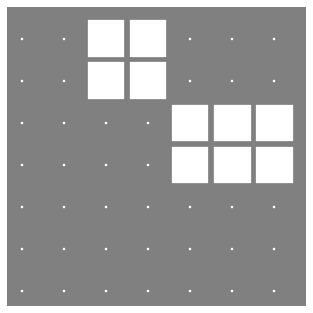

In [0]:
import numpy as np
from neupy import plots

# for visualization issues instead for setting the missing connection to 0
# we set them to 0.01
myFF = 2*(2*[0.01]+2*[3]+3*[0.01]) + 2* (4*[0.01]+ 3*[3]) + 3*(7*[0.01])
myFF = np.array(myFF).reshape(7,7)
#print(myFF)
#hinton diagram corresponding to the feed forward neural network example
plots.hinton(myFF,add_legend=False)

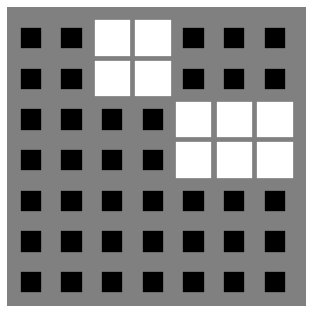

In [0]:
# an other possible visualization
# missing connections are represented
# by black squares

myFF2 = 2*(2*[-1]+2*[3]+3*[-1]) + 2* (4*[-1]+ 3*[3]) + 3*(7*[-1])
myFF2 = np.array(myFF2).reshape(7,7)
#print(myFF2)
#hinton diagram corresponding to the feed forward neural network example
plots.hinton(myFF2,add_legend=False)

## Recurrent Networks
* Direct Recurrence:
  * Multiple layers with connections allowed to neurons of the following layers
  * A  neuron can also be connected to itself
  



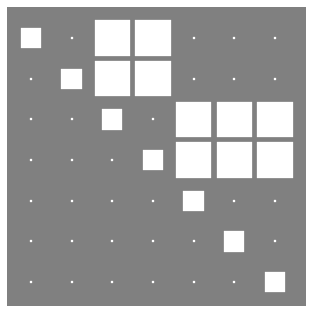

In [0]:
# direct recurrent connections are represented by 
# smaller squares than the others connections
myDR = ([1]+[0.01]+2*[3]+3*[0.01])+([0.01]+[1]+2*[3]+3*[0.01]) +  \
        (2*[0.01]+[1]+[0.01]+ 3*[3])+(3*[0.01]+[1]+ 3*[3]) +  \
        (4*[0.01] +[1]+ 2*[0.01])+ \
        (5*[0.01]+[1]+[0.01])+ \
        (6*[0.01]+[1])

myDR = np.array(myDR).reshape(7,7)
#print(myDR)
plots.hinton(myDR,add_legend=False)

* Indirect Recurrence
  * Multiple layers with connections allowed to neurons of the following layers
  * Connections are also allowed between neurons and preceding layer


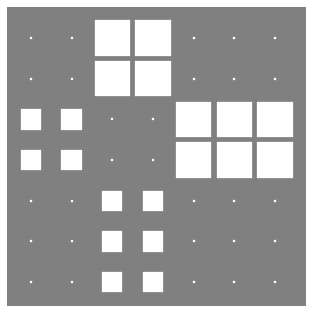

In [0]:
# indirect recurrent connections are represented by 
# smaller squares than the others connections
myIR = 2*(2*[0.01]+2*[3]+3*[0.01])+  \
        2*(2*[1]+2*[0.01]+ 3*[3]) +  \
        3*(2*[0.01] + 2*[1]+3*[0.01])       
        

myIR = np.array(myIR).reshape(7,7)
#print(myIR)
plots.hinton(myIR,add_legend=False)

* Lateral  Recurrence
  * Multiple layers with connections allowed to neurons of the following layers 
  * Connections between neurons of the same layer are allowed

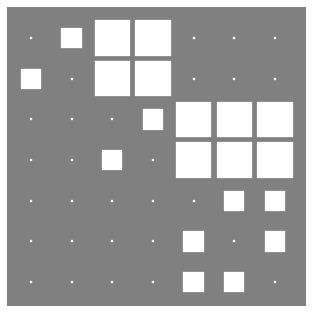

In [0]:
# Lateral recurrent connections are represented by 
# smaller squares than the others connections
myLR = ([0.01]+[1]+2*[3]+3*[0.01])+([1]+[0.01]+2*[3]+3*[0.01])+\
        (3*[0.01]+[1]+ 3*[3])+(2*[0.01]+[1]+[0.01]+ 3*[3])+\
        (5*[0.01] + 2*[1])+ \
        (4*[0.01]+[1]+[0.01]+[1])+ \
        (4*[0.01]+2*[1]+[0.01])

myLR = np.array(myLR).reshape(7,7)
#print(myLR)
plots.hinton(myLR,add_legend=False)

## Fully connected Neural Network
* Multiple layers with connections allowed from any neuron to any other neuron
* Direct recurrence is not allowed
* Connections must be symmetric

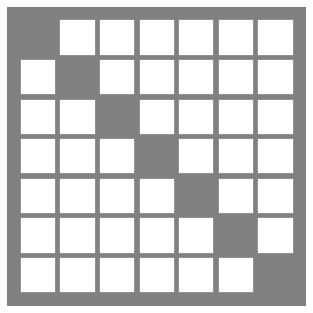

In [0]:
myFC = 49 *[3]
myFC = np.array(myFC).reshape(7,7)
for i in range(7):
  myFC[i,i] = 0.01
#print(myFC)
plots.hinton(myFC,add_legend=False)

# References

* Joshi Prateek. Artificial intelligence with Python. Packt Publishing, 2017.

* Jake VanderPlas. Python data science handbook: essential tools for working with data. O’Reilly Media, Inc, 2017.


* Neural Networks – II, Version 2 CSE IIT, Kharagpur, available at:https://nptel.ac.in/courses/106105078/pdf/Lesson%2038.pdf
Isaac Changhau, Loss Functions in Neural Networks, 2017, available at:
https://isaacchanghau.github.io/post/loss_functions/

* Sebastian Seung, The delta rule, MIT Department of Brain and Cognitive Sciences , Introduction to Neural Networks, 2005, https://ocw.mit.edu/courses/brain-and-cognitive-sciences/9-641j-introduction-to-neural-networks-spring-2005/lecture-notes/lec19_delta.pdf
* NeuPy, Neural Networks in Python, http://neupy.com/pages/home.html
